In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4>Load the fashion_mnist dataset using keras</h4>

In [136]:
(X_train, y_train), (X_test,y_test) =datasets.fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [137]:
X_test.shape

(10000, 28, 28)

In [138]:
y_train.shape

(60000,)

In [139]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [141]:
y_test = y_test.reshape(-1,)


<h4>Adding Labels</h4>

In [142]:
classes = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

Plot some images

In [143]:
def plot_sample(X, y, index):
 fig, ax = plt.subplots(ncols=index, figsize=(50,20))
 for idx in range(index): 


   ax[idx].imshow(X[idx])
   ax[idx].title.set_text(classes[y[idx]])

In [144]:
def plot_idx(X, y, idx):
    plt.figure(figsize = (15,2))
    plt.imshow(X[idx])
    plt.xlabel(classes[y[idx]])

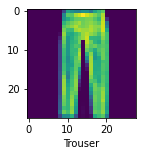

In [168]:
plot_idx(X_train, y_train,16)

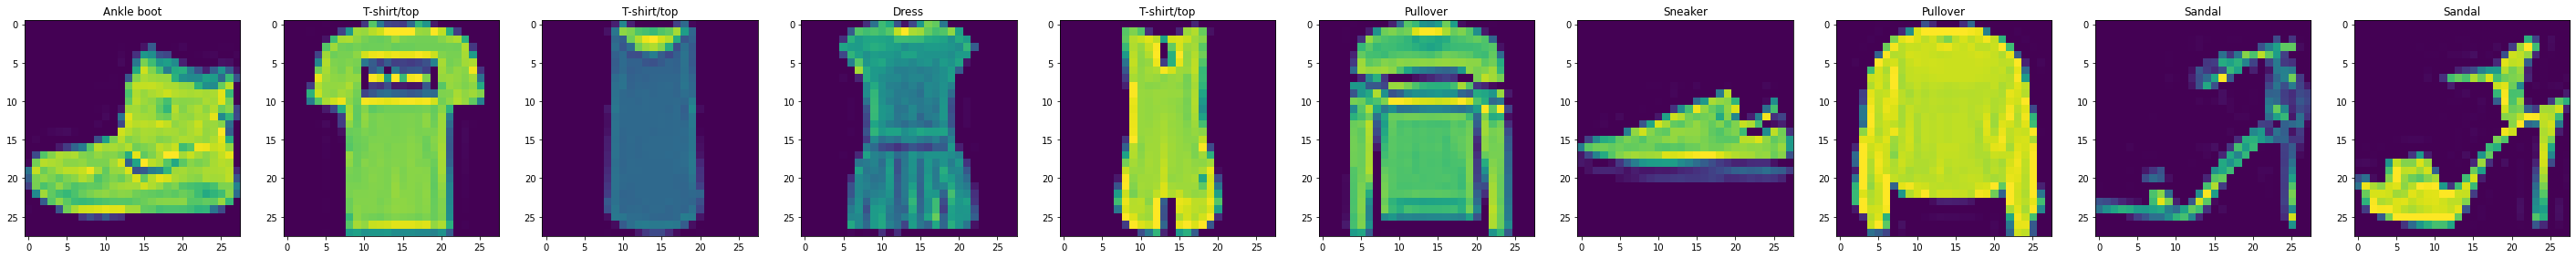

In [146]:
plot_sample(X_train, y_train, 10)

6000


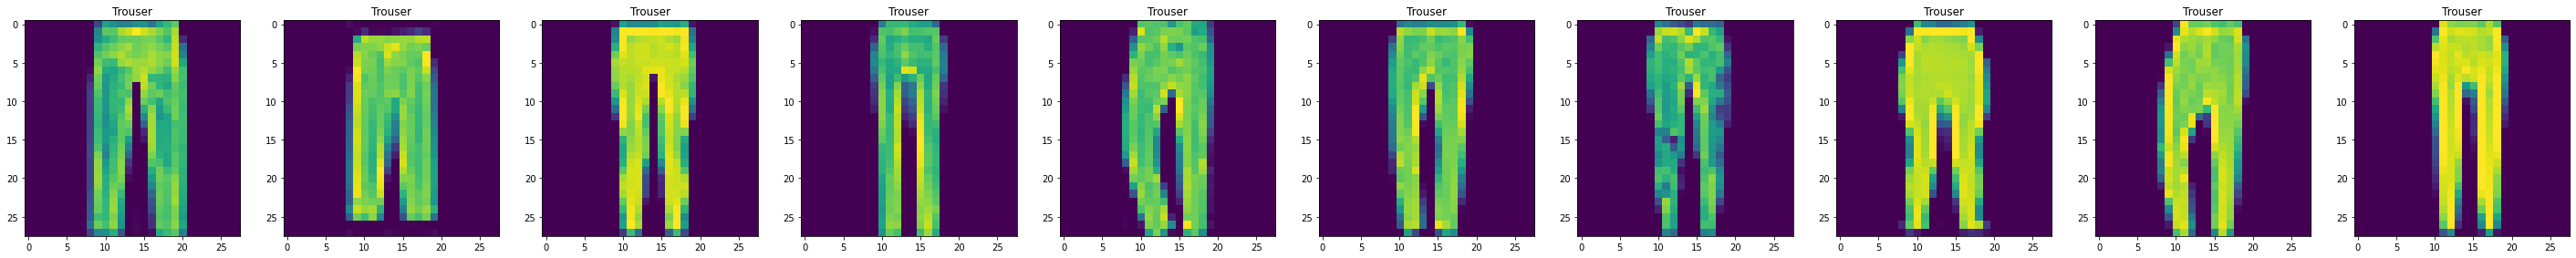

In [173]:
trousers = [x for x in range(len(y_train)) if y_train[x] == 1]
print(len(trousers))
plot_sample(X_train[trousers], y_train[trousers], 10)

<h4>Normalizing the training data</h4>

In [172]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

(60000, 28, 28)

In [148]:
X_train.shape

(60000, 28, 28)

In [149]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
     
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [150]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [166]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [151]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4664 - accuracy: 0.8303
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3109 - accuracy: 0.8861
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2644 - accuracy: 0.9029
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2320 - accuracy: 0.9147
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2093 - accuracy: 0.9223
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1885 - accuracy: 0.9298
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1685 - accuracy: 0.9372
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1542 - accuracy: 0.9425
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1380 - accuracy: 0.9475
Epoch 10/10
1875/1875 [==============================] - 32s 17m

In [152]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3237 - accuracy: 0.9045


[0.3237440884113312, 0.9045000076293945]

In [153]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[1.6738810e-11, 1.4989327e-11, 3.0291332e-12, 7.6060008e-10,
        2.7988823e-13, 1.2490352e-06, 2.0388971e-14, 3.9438578e-06,
        5.4285421e-10, 9.9999475e-01],
       [9.9474551e-07, 3.6645861e-17, 9.9999893e-01, 2.0053641e-09,
        7.9208057e-08, 1.5604686e-17, 3.0114231e-10, 5.3113568e-17,
        1.9662286e-12, 4.3039110e-13],
       [1.2284707e-12, 1.0000000e+00, 2.5604703e-12, 7.8020142e-12,
        4.2230940e-13, 1.5550820e-15, 2.2652069e-13, 7.9825999e-20,
        1.2430913e-16, 1.5473161e-18],
       [1.5454856e-09, 1.0000000e+00, 4.7309928e-10, 2.1733653e-09,
        9.8689308e-13, 5.6479162e-12, 5.3269011e-11, 6.2527542e-17,
        2.7471155e-15, 1.8632557e-16],
       [8.3585221e-01, 1.9583128e-08, 2.1698175e-03, 1.3713269e-03,
        1.4307637e-02, 1.3719179e-09, 1.4629894e-01, 2.1906466e-09,
        3.7678971e-09, 1.3953744e-08]], dtype=float32)

In [154]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[9, 2, 1, 1, 0]

In [155]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [157]:
y_classes[:5]

[9, 2, 1, 1, 0]

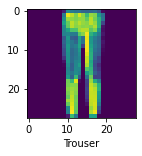

In [158]:
plot_idx(X_test, y_classes, 3)

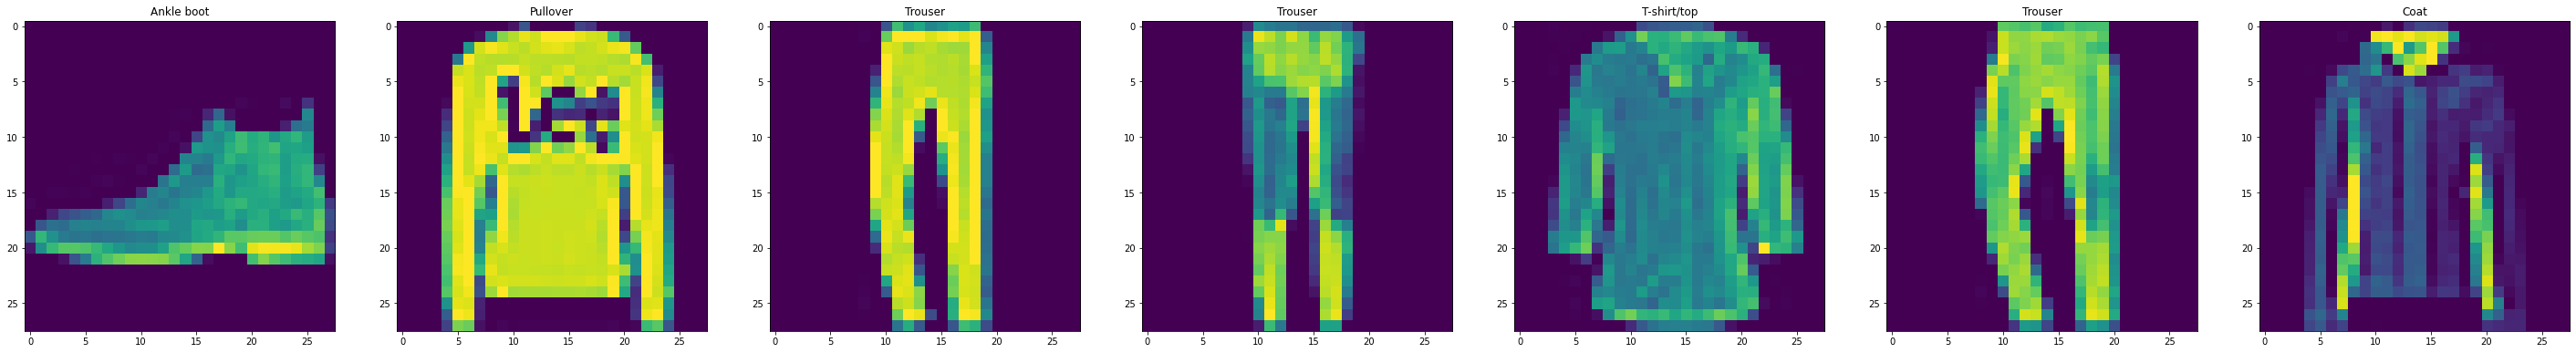

In [174]:
plot_sample(X_test, y_classes,7)